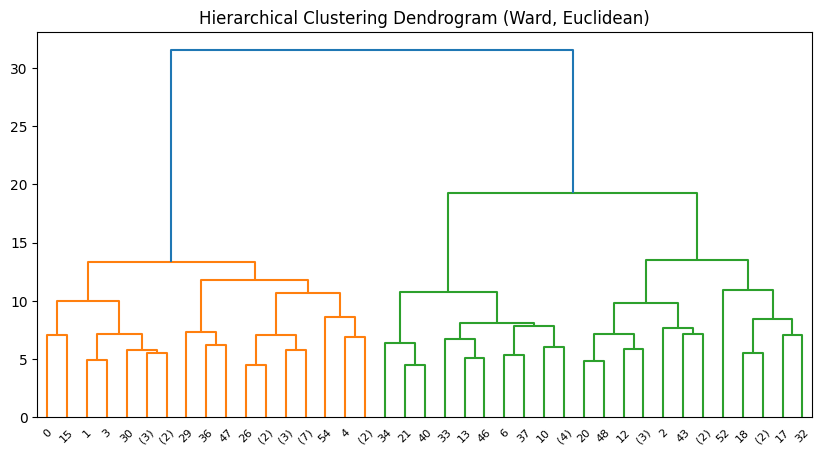

Cophenetic correlation coefficient for Ward with Euclidean: 0.5229525602426404
Clusters from Ward method with Euclidean: [1 1 2 1 1 1 2 2 1 2 2 1 2 2 2 1 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 2 2 2 1
 2 1 2 2 1 2 2 2 1 2 1 2 1 2 1 2 1 1 2 1 1 1]


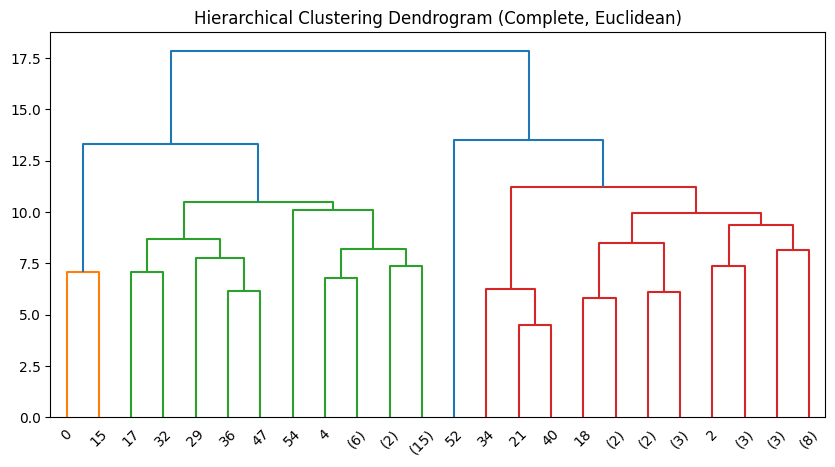

Cophenetic correlation coefficient for Complete with Euclidean: 0.5619176680481137
Clusters from Complete method with Euclidean: [1 2 3 2 2 2 3 3 2 3 3 2 3 3 3 1 3 2 3 2 3 3 2 2 2 3 2 2 2 2 2 2 2 3 3 3 2
 3 2 3 3 2 3 3 3 2 3 2 3 2 3 2 4 2 2 3 2 2 2]


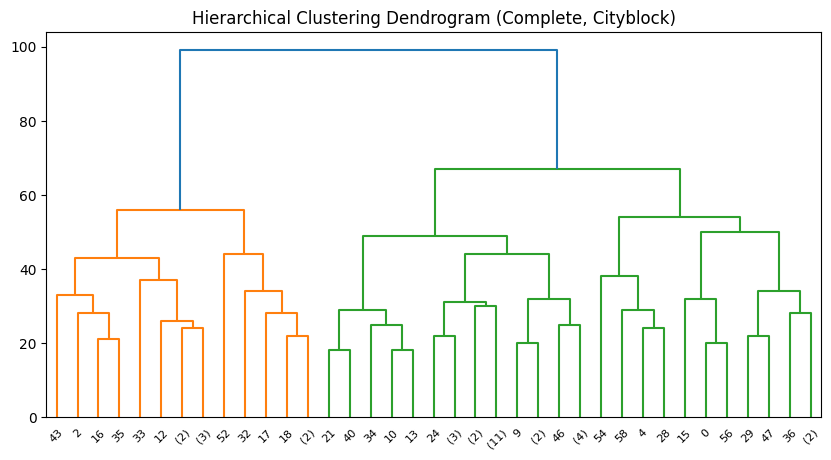

Cophenetic correlation coefficient for Complete with Cityblock: 0.6009463067871695
Clusters from Complete method with Cityblock: [2 2 1 2 2 2 2 1 2 2 2 2 1 2 1 2 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2
 2 2 1 2 2 2 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2]


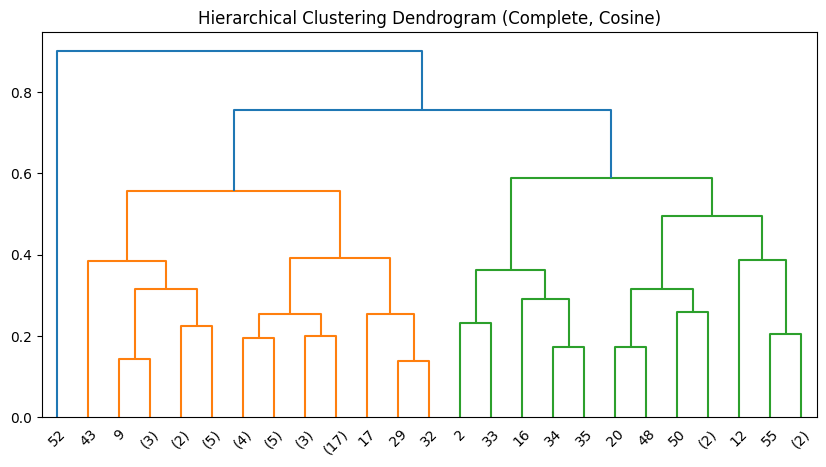

Cophenetic correlation coefficient for Complete with Cosine: 0.5759466571819083
Clusters from Complete method with Cosine: [1 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 2 1 2 1 3 1 1 2 1 1 1]


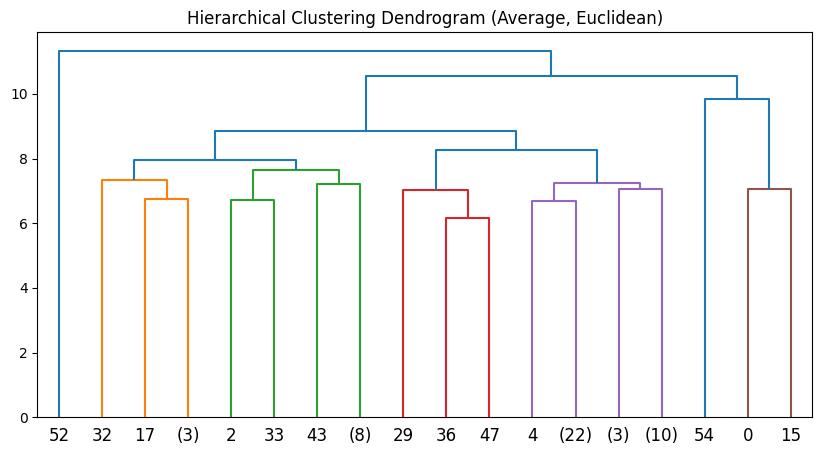

Cophenetic correlation coefficient for Average with Euclidean: 0.7443443875713218
Clusters from Average method with Euclidean: [5 4 2 4 4 4 4 2 4 4 4 4 2 4 2 5 2 1 1 4 2 4 4 4 4 4 4 4 4 3 4 4 1 2 4 2 3
 4 4 1 4 4 4 2 4 4 4 3 2 4 2 4 7 4 6 1 4 4 4]


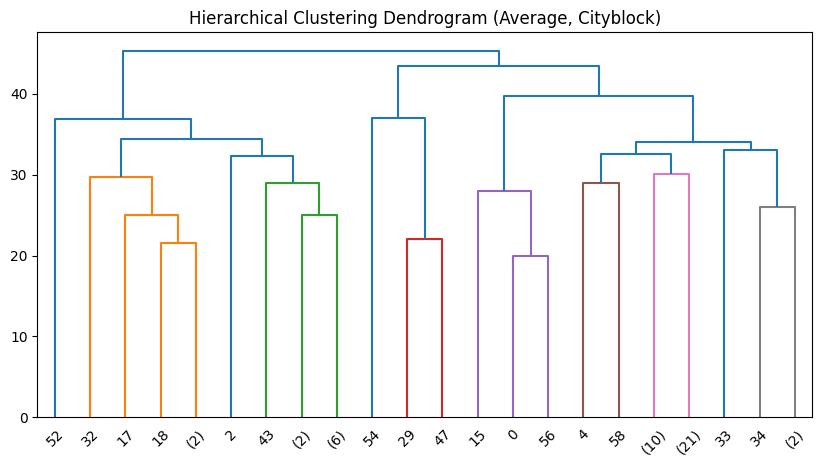

Cophenetic correlation coefficient for Average with Cityblock: 0.6754567533614533
Clusters from Average method with Cityblock: [ 7  9  3  9  8  9  9  2  9  9  9  9  2  9  2  7  2  1  1  9  2 10  9  9
  9  9  9  9  9  5  9  9  1 11 10  2  9  9  9  1 10  9  9  2  9  9  9  5
  2  9  2  9  4  9  6  1  7  9  8]


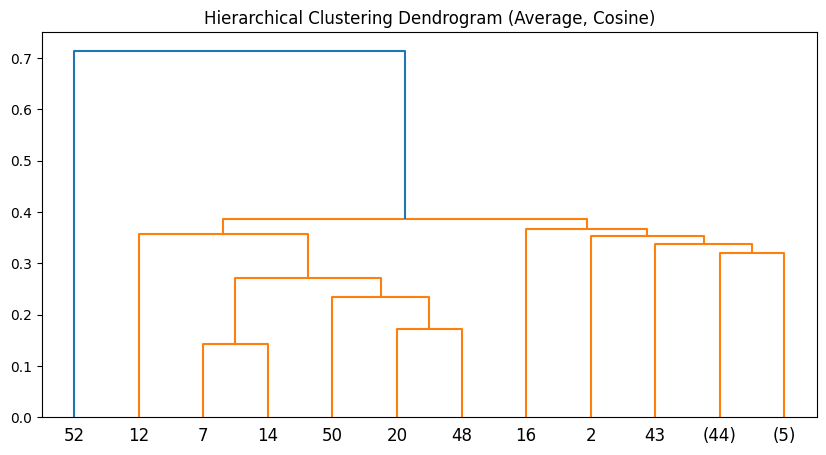

Cophenetic correlation coefficient for Average with Cosine: 0.5872274635801054
Clusters from Average method with Cosine: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]


In [8]:
from pathlib import Path
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Determine the current file path and the parent directory path
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent

# Define the input file path
input_file_path = parent_directory_path / "data" / "03_Processed" / "03_Filtered_Selected_Features.csv"

# Load data from the CSV file
data = pd.read_csv(input_file_path)

# Set 'Participant ID' as the index
data.set_index('Participant ID', inplace=True)

# Select numerical columns for correlation analysis
data_numeric = data.select_dtypes(include=['number'])

# Convert the DataFrame to a numpy array
X = data_numeric.values

# Apply various linkage methods and metrics
linkage_methods = ['ward', 'complete', 'average']
metrics = ['euclidean', 'cityblock', 'cosine']

for method in linkage_methods:
    for metric in metrics:
        if method == 'ward' and metric != 'euclidean':
            continue  # Ward can only be used with Euclidean metric
        Z = linkage(X, method=method, metric=metric)
        coph_dist = cophenet(Z, pdist(X))[0]
        plt.figure(figsize=(10, 5))
        plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()}, {metric.capitalize()})')
        dendrogram(Z, truncate_mode='level', p=5)
        plt.show()
        print(f"Cophenetic correlation coefficient for {method.capitalize()} with {metric.capitalize()}: {coph_dist}")

        # Determine the threshold to cut the dendrogram
        max_d = 0.7 * max(Z[:, 2])
        clusters = fcluster(Z, max_d, criterion='distance')
        print(f"Clusters from {method.capitalize()} method with {metric.capitalize()}: {clusters}")


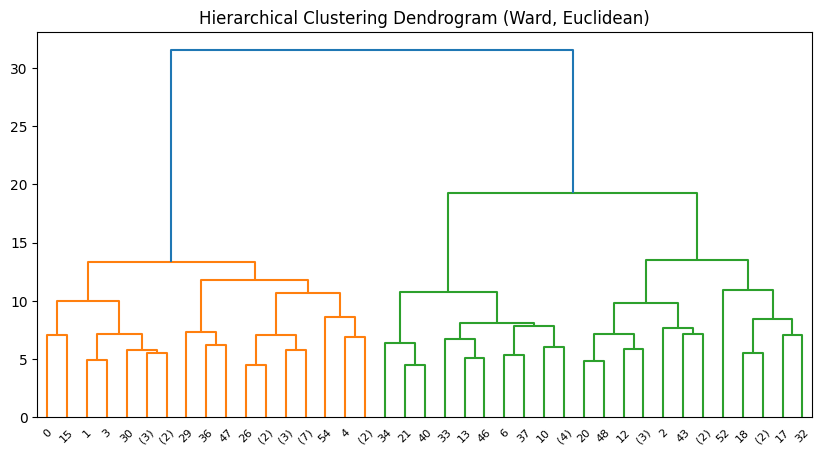

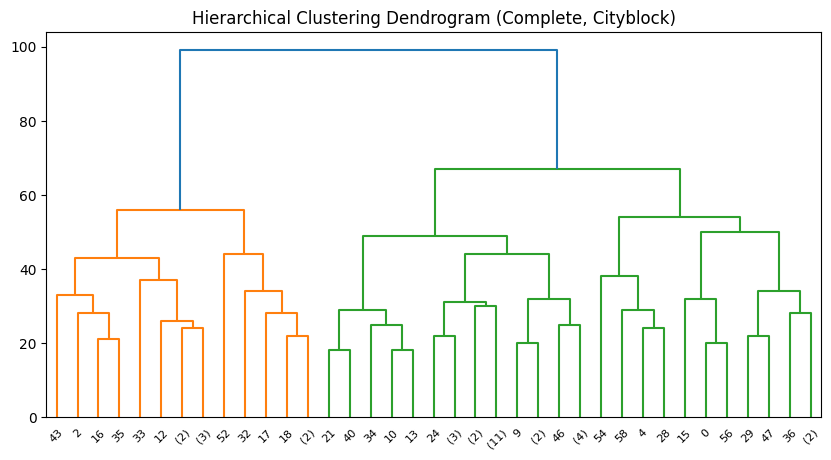

In [9]:
from pathlib import Path
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Determine the current file path and the parent directory path
current_file_path = Path(__name__).resolve()
parent_directory_path = current_file_path.parent.parent

# Define the input file path
input_file_path = parent_directory_path / "data" / "03_Processed" / "03_Filtered_Selected_Features.csv"

# Load data from the CSV file
data = pd.read_csv(input_file_path)

# Set 'Participant ID' as the index
data.set_index('Participant ID', inplace=True)

# Select numerical columns for correlation analysis
data_numeric = data.select_dtypes(include=['number'])

# Convert the DataFrame to a numpy array
X = data_numeric.values

# Metoda Warda z metryką euklidesową
Z_ward = linkage(X, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram (Ward, Euclidean)')
dendrogram(Z_ward, truncate_mode='level', p=5)
plt.show()

# Pełne łączenie z metryką cityblock
Z_complete = linkage(X, method='complete', metric='cityblock')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram (Complete, Cityblock)')
dendrogram(Z_complete, truncate_mode='level', p=5)
plt.show()
